In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [24]:
BASE_URL = 'https://www.amazon.co.uk'
BEST_SELLER_URL = f"{BASE_URL}/bestsellers/?ref_=nav_cs_bestsellers"

In [25]:
def get_soup(url,i=0):
    if i==10: return None

    response = requests.get(url)
    if response.status_code == 200:
        return  BeautifulSoup(response.content, "html.parser")
    else:
        print(f'trying {i}th times')
        get_soup(url,i+1)

In [58]:

def get_amazon_bestsellers_categories(url):
    soup = get_soup(url)
    return { item.select_one('a').text.strip(): BASE_URL + item.select_one("a")["href"]
            for item in soup.select("._p13n-zg-nav-tree-all_style_zg-browse-item__1rdKf")}


categories = get_amazon_bestsellers_categories(BEST_SELLER_URL)
len(categories), categories

(34,
 {'Amazon Devices & Accessories': 'https://www.amazon.co.uk/Best-Sellers-Amazon-Devices-Accessories/zgbs/amazon-devices',
  'Amazon Renewed': 'https://www.amazon.co.uk/Best-Sellers-Amazon-Renewed/zgbs/amazon-renewed',
  'Apps & Games': 'https://www.amazon.co.uk/Best-Sellers-Apps-Games/zgbs/mobile-apps',
  'Automotive': 'https://www.amazon.co.uk/Best-Sellers-Automotive/zgbs/automotive',
  'Baby Products': 'https://www.amazon.co.uk/Best-Sellers-Baby-Products/zgbs/baby',
  'Beauty': 'https://www.amazon.co.uk/Best-Sellers-Beauty/zgbs/beauty',
  'Books': 'https://www.amazon.co.uk/best-sellers-books-Amazon/zgbs/books',
  'Business, Industry & Science': 'https://www.amazon.co.uk/Best-Sellers-Business-Industry-Science/zgbs/industrial',
  'CDs & Vinyl': 'https://www.amazon.co.uk/Best-Sellers-CDs-Vinyl/zgbs/music',
  'Climate Pledge Friendly': 'https://www.amazon.co.uk/Best-Sellers-Climate-Pledge-Friendly/zgbs/climate-pledge',
  'Computers & Accessories': 'https://www.amazon.co.uk/Best-Sell

In [141]:

def scrape_category(category_name,category_url):
    soup = get_soup(category_url)
    product_divs = soup.select("#gridItemRoot")

    products = []
    for item in product_divs:
        price = item.select_one(".p13n-sc-price")
        rating = item.select_one(".a-icon-alt")
        reviews = item.select_one(".a-icon-row .a-size-small")
        link = item.select_one("a.a-link-normal")
       
        products.append({
            'category': category_name,
            'title': link['href'].split('/')[1] if link else None,
            'price': price.get_text(strip=True) if price else None,
            'rating': rating.get_text(strip=True) if rating else None,
            'reviews': reviews.get_text(strip=True) if reviews else None,
            'link': link['href'] if link else None
        })
    next_url = soup.select_one('.a-last>a')
    return products,next_url


In [152]:
# all_products = []

# for category_name, category_url in categories.items():
#     print(f"Scraping category: {category_name}")
#     products,next_url = scrape_category(category_name, category_url)
#     if next_url:
#         all_products.extend(scrape_category(category_name,BASE_URL+next_url['href'])[0])
#     all_products.extend(products)


Scraping category: Amazon Devices & Accessories
Scraping category: Amazon Renewed
Scraping category: Apps & Games
Scraping category: Automotive
Scraping category: Baby Products
Scraping category: Beauty
Scraping category: Books
Scraping category: Business, Industry & Science
Scraping category: CDs & Vinyl
Scraping category: Climate Pledge Friendly
Scraping category: Computers & Accessories
Scraping category: Digital Music
Scraping category: DIY & Tools
Scraping category: DVD & Blu-ray
Scraping category: Electronics & Photo
Scraping category: Fashion
Scraping category: Garden
Scraping category: Gift Cards
Scraping category: Grocery
Scraping category: Handmade Products
Scraping category: Health & Personal Care
Scraping category: Home & Kitchen
Scraping category: Kindle Store
Scraping category: Large Appliances
Scraping category: Lighting
Scraping category: Musical Instruments & DJ
Scraping category: New Finds
Scraping category: PC & Video Games
Scraping category: Pet Supplies
Scraping ca

In [153]:
# df = pd.DataFrame(all_products)
# df.to_csv('amazon_best_sellers.csv', index=False)
# print("Data has been saved to 'amazon_best_sellers.csv'")

Data has been saved to 'amazon_best_sellers.csv'


In [17]:
df = pd.read_csv('amazon_best_sellers.csv')
df

,category,title,price,rating,reviews,link
0,Amazon Devices & Accessories,ring-outdoor-siren,£69.99,4.7 out of 5 stars,"2,420",/ring-outdoor-siren/dp/B08HGYR7JC/ref=zg_bs_g_...
1,Amazon Devices & Accessories,ring-3m-usb-a-to-micro-usb-power-cable-for-rin...,£7.99,4.5 out of 5 stars,"1,917",/ring-3m-usb-a-to-micro-usb-power-cable-for-ri...
2,Amazon Devices & Accessories,ring-spotlight-cam-plus,£106.49,4.5 out of 5 stars,"2,576",/ring-spotlight-cam-plus/dp/B09K1D35TK/ref=zg_...
3,Amazon Devices & Accessories,blink-sync-module-2,£34.99,4.3 out of 5 stars,"4,114",/blink-sync-module-2/dp/B08BJ9ZCZC/ref=zg_bs_g...
4,Amazon Devices & Accessories,blink-mini-pan-tilt-mount,£39.99,4.5 out of 5 stars,"2,158",/blink-mini-pan-tilt-mount/dp/B09N6RD4ZS/ref=z...
...,...,...,...,...,...,...
3292,Toys & Games,Mega-Bloks-Construx-DCH55-Building,£9.50,4.8 out of 5 stars,"57,339",/Mega-Bloks-Construx-DCH55-Building/dp/B0083F2...
3293,Toys & Games,Colorful-Erasable-Reusable-Learning-Toddlers,£6.99,4.4 out of 5 stars,"11,199",/Colorful-Erasable-Reusable-Learning-Toddlers/...
3294,Toys & Games,Stretchy-Smile-Fillers-Yellow-Elastic,£2.02,4.3 out of 5 stars,"1,042",/Stretchy-Smile-Fillers-Yellow-Elastic/dp/B09D...
3295,Toys & Games,Play-Doh-A5417EU9-Compound-Collection-Multicolour,£6.00,4.7 out of 5 stars,"17,324",/Play-Doh-A5417EU9-Compound-Collection-Multico...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297 entries, 0 to 3296
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  3297 non-null   object
 1   title     3297 non-null   object
 2   price     3275 non-null   object
 3   rating    3246 non-null   object
 4   reviews   3246 non-null   object
 5   link      3297 non-null   object
dtypes: object(6)
memory usage: 154.7+ KB


In [19]:
df.describe()

,category,title,price,rating,reviews,link
count,3297,3297,3275,3246,3246,3297
unique,33,3064,1160,30,2456,3297
top,Amazon Devices & Accessories,echo-pop,£9.99,4.6 out of 5 stars,"119,128",/ring-outdoor-siren/dp/B08HGYR7JC/ref=zg_bs_g_...
freq,100,7,105,635,26,1


In [26]:
# converting data types
df.link = BASE_URL+df.link
df.price = df.price.str[1:].apply(lambda x: float(x))
df.rating = df.rating.apply(lambda x: float(str(x)[:3]))
df.reviews = df.reviews.apply(lambda x: float(str(x).replace(',','')))

In [27]:
df.describe()

,price,rating,reviews
count,3275.000000,3246.000000,3.246000e+03
mean,25.253582,4.447998,1.891826e+04
std,52.195131,0.335722,8.096256e+04
min,0.260000,1.000000,1.000000e+00
25%,5.500000,4.300000,7.360000e+02
50%,9.990000,4.500000,3.915000e+03
75%,19.950000,4.600000,1.350275e+04
max,658.990000,5.000000,1.490538e+06


In [28]:
reviews_stat = df.groupby('category')['reviews'].describe().sort_values('50%').round(2)
reviews_stat['category']=reviews_stat.index
reviews_stat.reset_index(drop=True,inplace=True)
reviews_stat

,count,mean,std,min,25%,50%,75%,max,category
0,97.0,2885.41,14772.96,1.0,65.00,155.0,897.00,142607.0,Apps & Games
1,95.0,461.19,851.31,1.0,63.00,183.0,413.00,5649.0,Handmade Products
2,100.0,767.89,1589.04,5.0,111.75,250.5,686.00,11322.0,Amazon Renewed
3,80.0,3446.42,6504.64,2.0,119.25,435.0,3466.50,39277.0,CDs & Vinyl
4,96.0,3109.85,6996.94,1.0,48.75,516.0,2459.00,47862.0,DVD & Blu-ray
5,100.0,1372.04,2543.64,2.0,104.25,519.5,1432.00,18902.0,Large Appliances
6,97.0,1718.88,2779.42,2.0,95.00,643.0,2412.00,11906.0,Software
7,98.0,6810.12,14710.64,1.0,119.25,921.0,6554.00,94785.0,New Finds
8,100.0,3736.28,5160.47,50.0,609.50,1711.0,4379.00,28077.0,"Business, Industry & Science"
9,97.0,4373.36,6478.21,1.0,427.00,1739.0,4628.00,30550.0,Prime Video


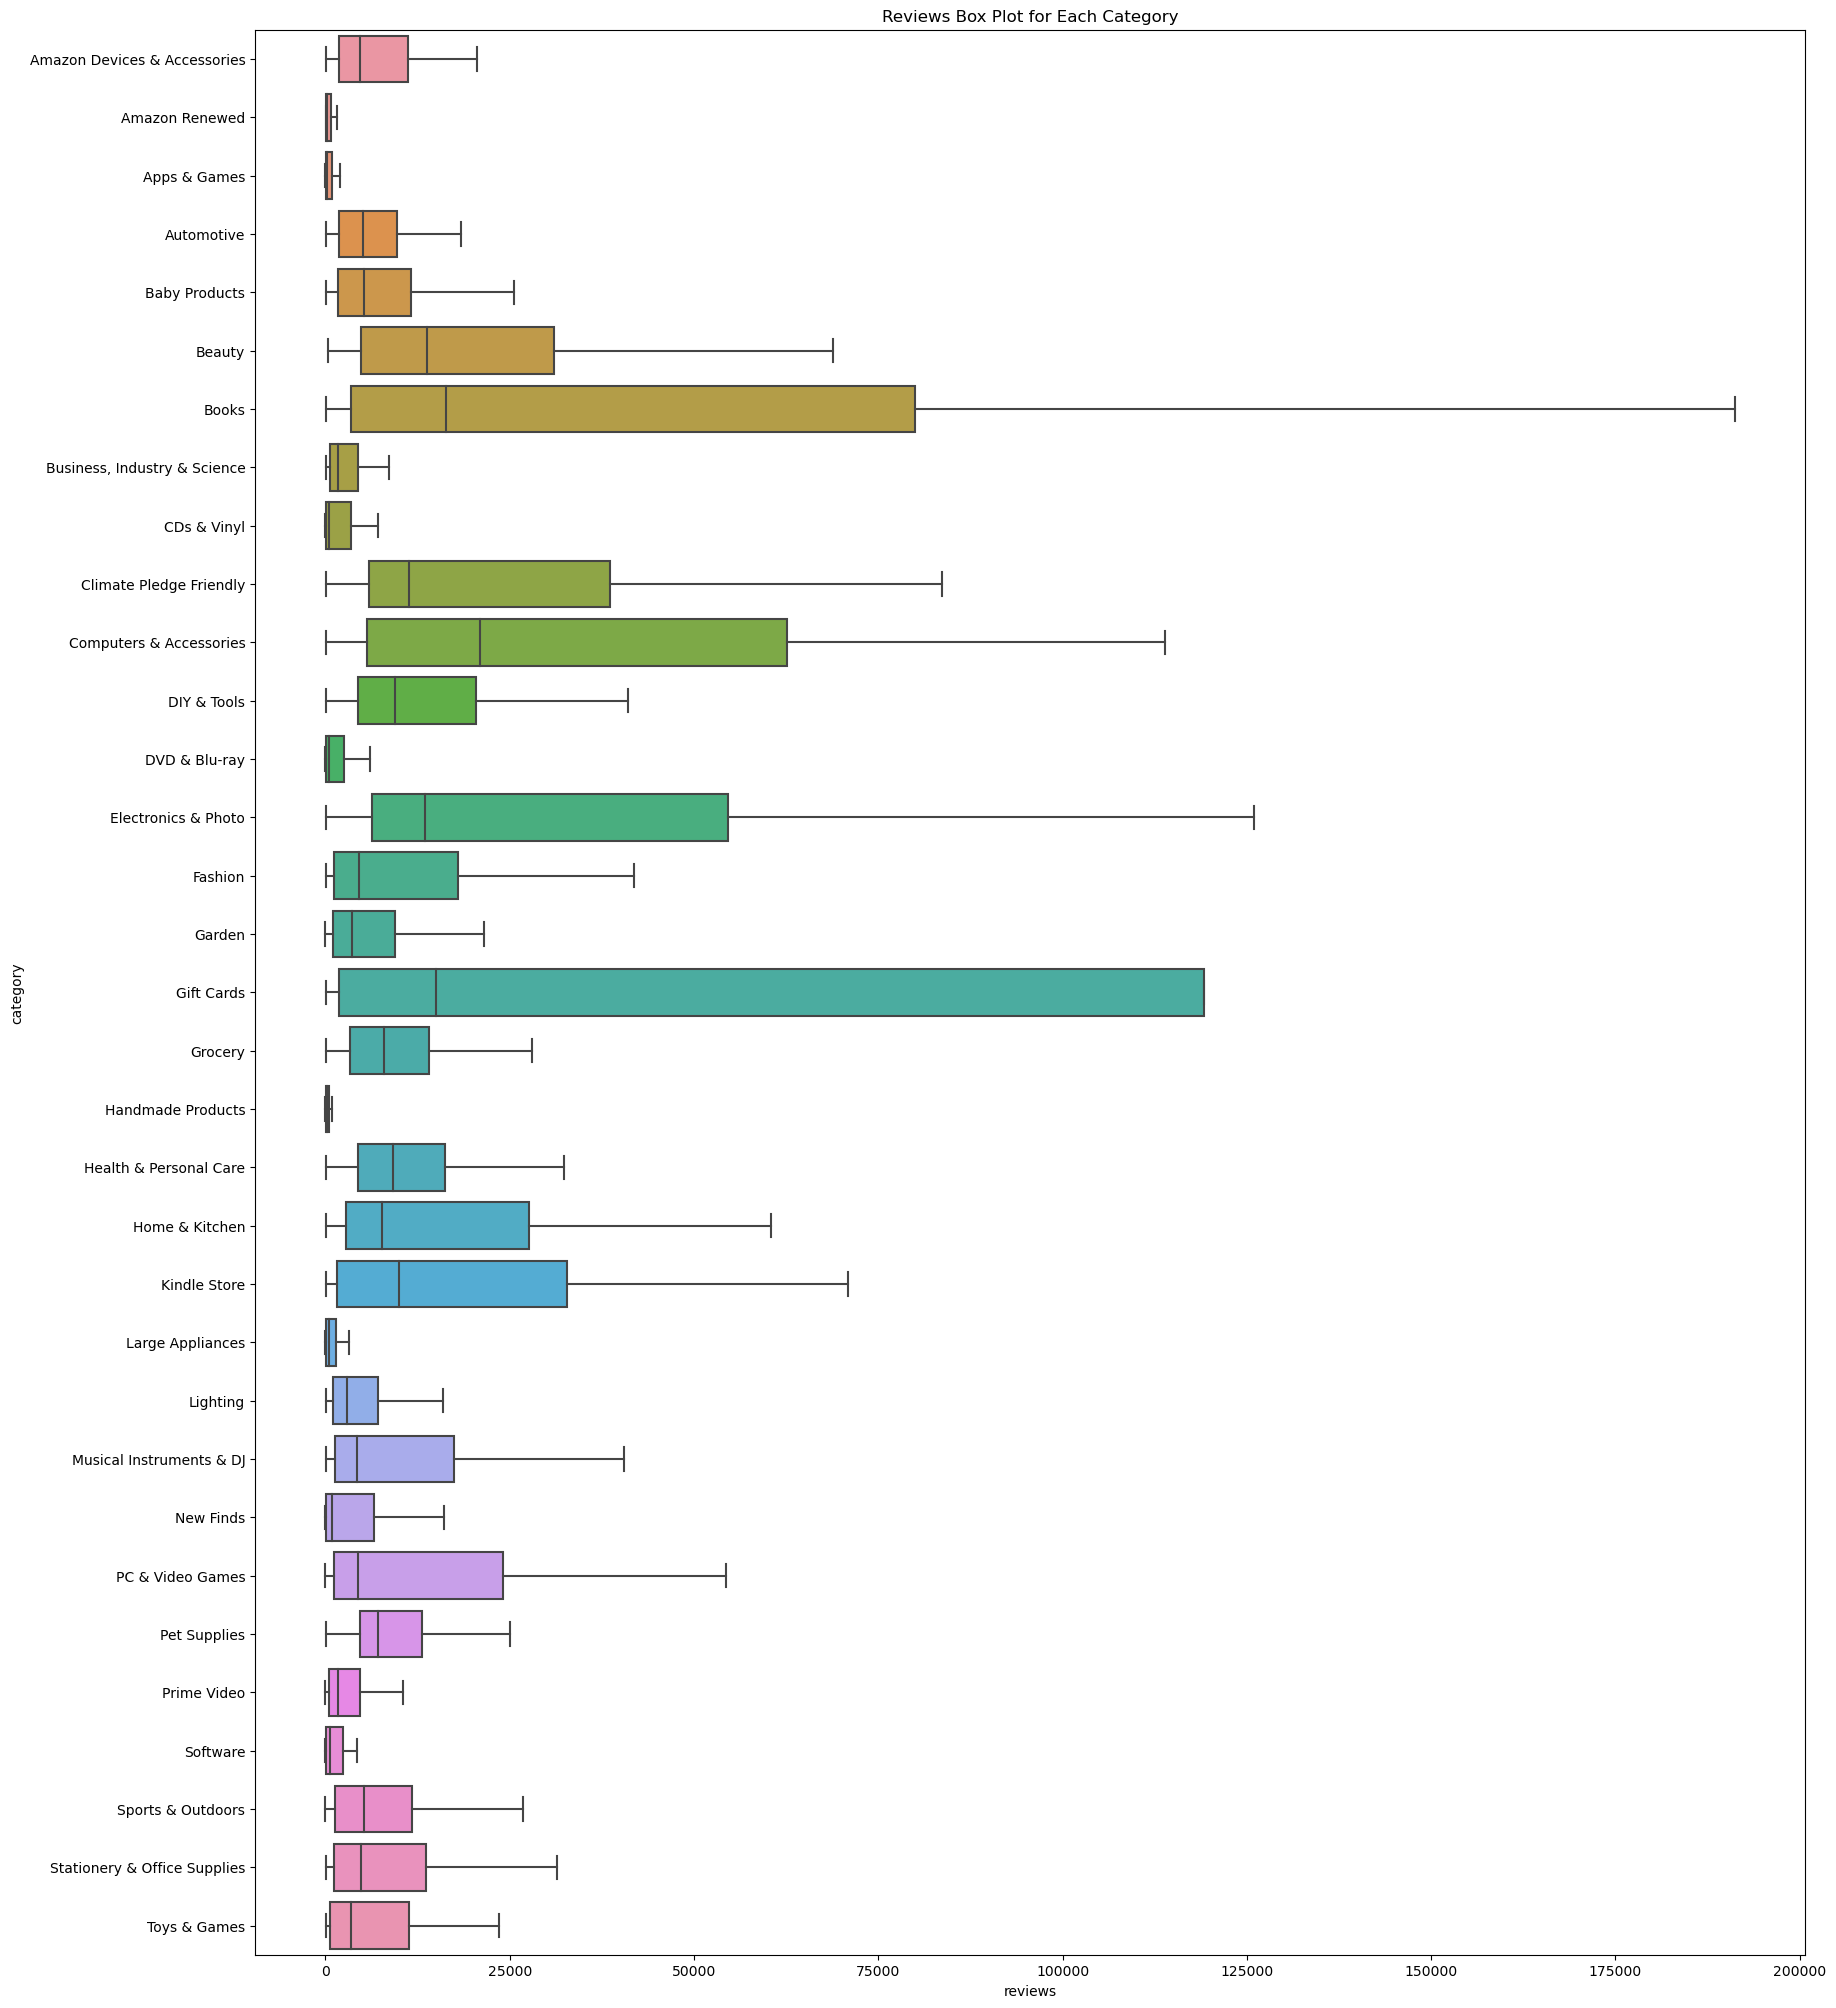

In [29]:
# Draw box plots using Seaborn
plt.figure(figsize=(20, 25))
sns.boxplot(y='category', x='reviews', data=df,showfliers=False)
plt.title('Reviews Box Plot for Each Category')
plt.show()

In [30]:
price_stat = df.groupby('category')['price'].describe().sort_values('50%').round(2)
price_stat

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Kindle Store,98.0,2.13,1.83,0.99,0.99,0.99,2.99,12.99
Books,100.0,5.63,4.38,0.50,2.39,4.86,6.90,19.99
Prime Video,100.0,7.26,5.05,0.99,3.49,4.99,9.99,23.99
Stationery & Office Supplies,100.0,7.87,6.48,0.26,3.98,5.80,9.08,33.99
Apps & Games,100.0,5.61,2.82,0.59,3.10,5.99,7.99,15.22
Handmade Products,100.0,7.31,4.54,1.49,3.95,5.99,8.99,23.45
DIY & Tools,100.0,11.10,20.09,0.29,4.00,5.99,9.95,159.99
Beauty,99.0,7.50,5.37,0.99,4.97,6.74,8.72,42.94
Grocery,100.0,8.17,5.85,1.00,3.63,7.00,10.69,31.50


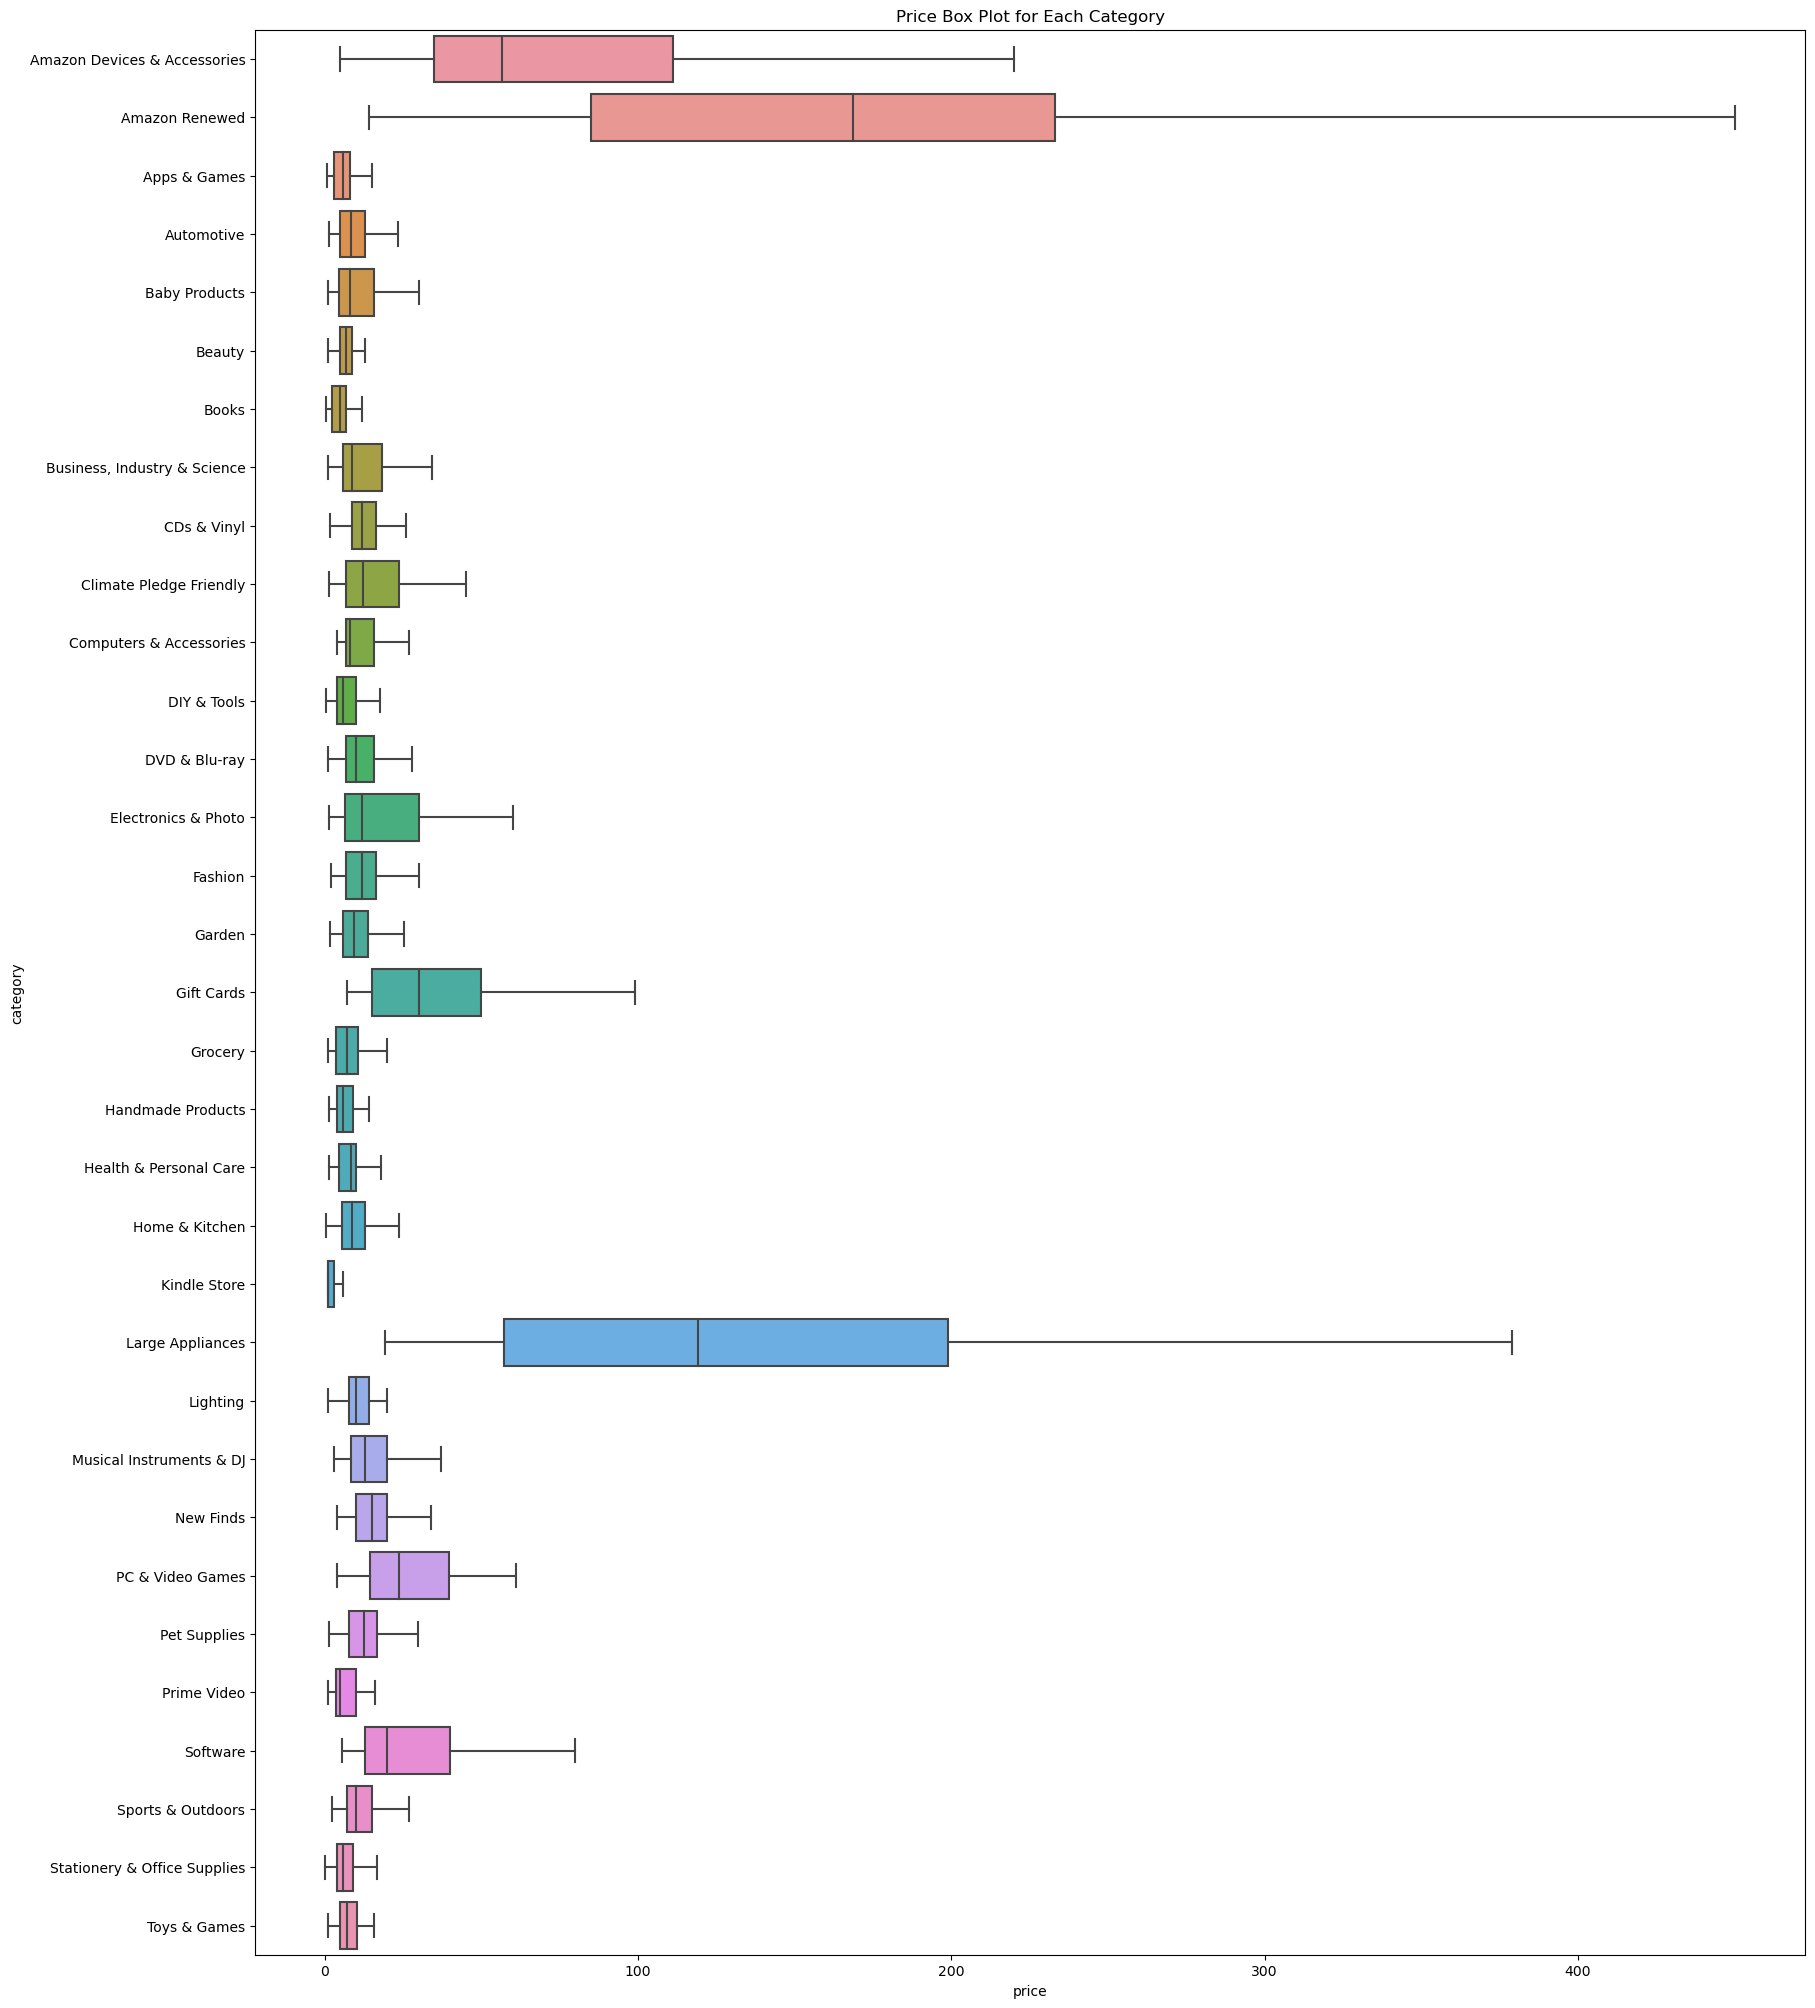

In [31]:
# Draw box plots using Seaborn
plt.figure(figsize=(20, 25))
sns.boxplot(y='category', x='price', data=df,showfliers=False)
plt.title('Price Box Plot for Each Category')
plt.show()

In [32]:
rating_stat=df.groupby('category')['rating'].describe().sort_values('50%').round(2)
rating_stat

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Apps & Games,97.0,3.39,0.69,1.0,3.10,3.30,3.80,5.0
Amazon Renewed,100.0,4.19,0.25,3.3,4.10,4.20,4.30,4.7
Software,97.0,4.30,0.29,3.4,4.10,4.30,4.40,5.0
Kindle Store,100.0,4.37,0.22,3.5,4.30,4.40,4.50,4.8
Garden,100.0,4.43,0.23,3.8,4.30,4.40,4.60,5.0
Fashion,99.0,4.37,0.23,3.1,4.30,4.40,4.50,4.8
Large Appliances,100.0,4.39,0.24,3.7,4.30,4.40,4.50,5.0
Prime Video,97.0,4.32,0.39,2.5,4.10,4.40,4.60,5.0
New Finds,98.0,4.41,0.29,3.6,4.20,4.50,4.60,5.0


In [33]:
df_median = df.groupby('category')[['price','reviews','rating']].median().sort_values('reviews').round(2)
df_median

,price,reviews,rating
category,,,
Apps & Games,5.99,155.0,3.30
Handmade Products,5.99,183.0,4.60
Amazon Renewed,168.74,250.5,4.20
CDs & Vinyl,11.99,435.0,4.70
DVD & Blu-ray,9.99,516.0,4.50
Large Appliances,119.00,519.5,4.40
Software,19.99,643.0,4.30
New Finds,14.99,921.0,4.50
"Business, Industry & Science",8.73,1711.0,4.50


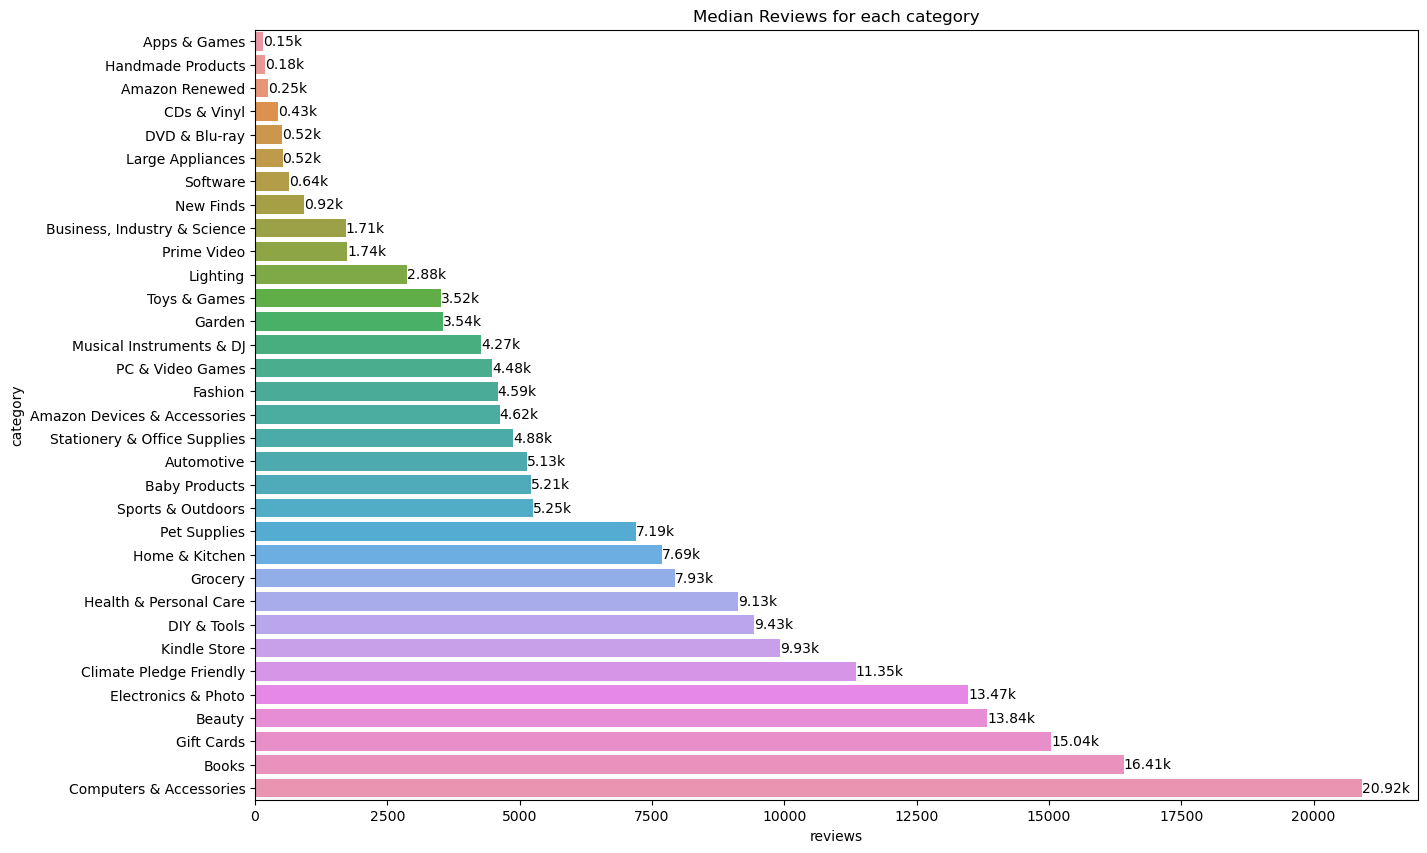

In [34]:
plt.figure(figsize=(15,10))
ax = sns.barplot(df_median,y=df_median.index,x=df_median.reviews,orient='h')
plt.title('Median Reviews for each category')

for index, value in enumerate(df_median['reviews']):
    ax.text(value, index, f'{(value/1000):.2f}k', color='black', va="center")

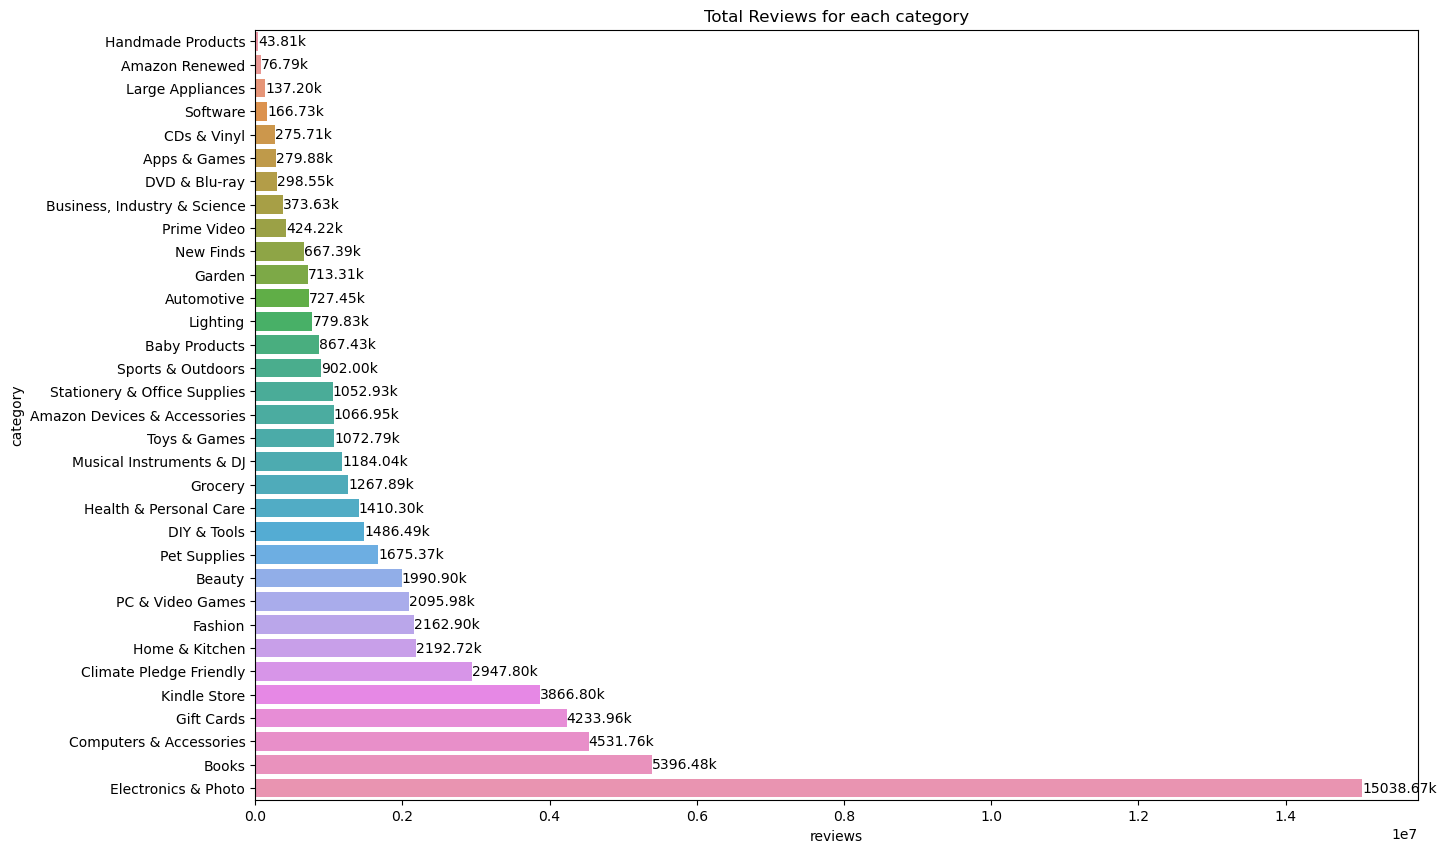

In [35]:
df_sum = df.groupby('category')[['price','reviews','rating']].sum().sort_values('reviews').round(2)

plt.figure(figsize=(15,10))
ax = sns.barplot(df_sum,y=df_sum.index,x=df_sum.reviews,orient='h')
plt.title('Total Reviews for each category')

for index, value in enumerate(df_sum['reviews']):
    ax.text(value, index, f'{(value/1000):.2f}k', color='black', va="center")

In [36]:
df_mean = df.groupby('category')[['price','reviews','rating']].mean().sort_values('reviews').round(2)
df_mean

,price,reviews,rating
category,,,
Handmade Products,7.31,461.19,4.55
Amazon Renewed,185.63,767.89,4.18
Large Appliances,131.92,1372.04,4.39
Software,32.30,1718.88,4.30
Apps & Games,5.61,2885.41,3.39
DVD & Blu-ray,14.81,3109.85,4.37
CDs & Vinyl,15.34,3446.42,4.64
"Business, Industry & Science",12.58,3736.28,4.50
Prime Video,7.26,4373.36,4.32


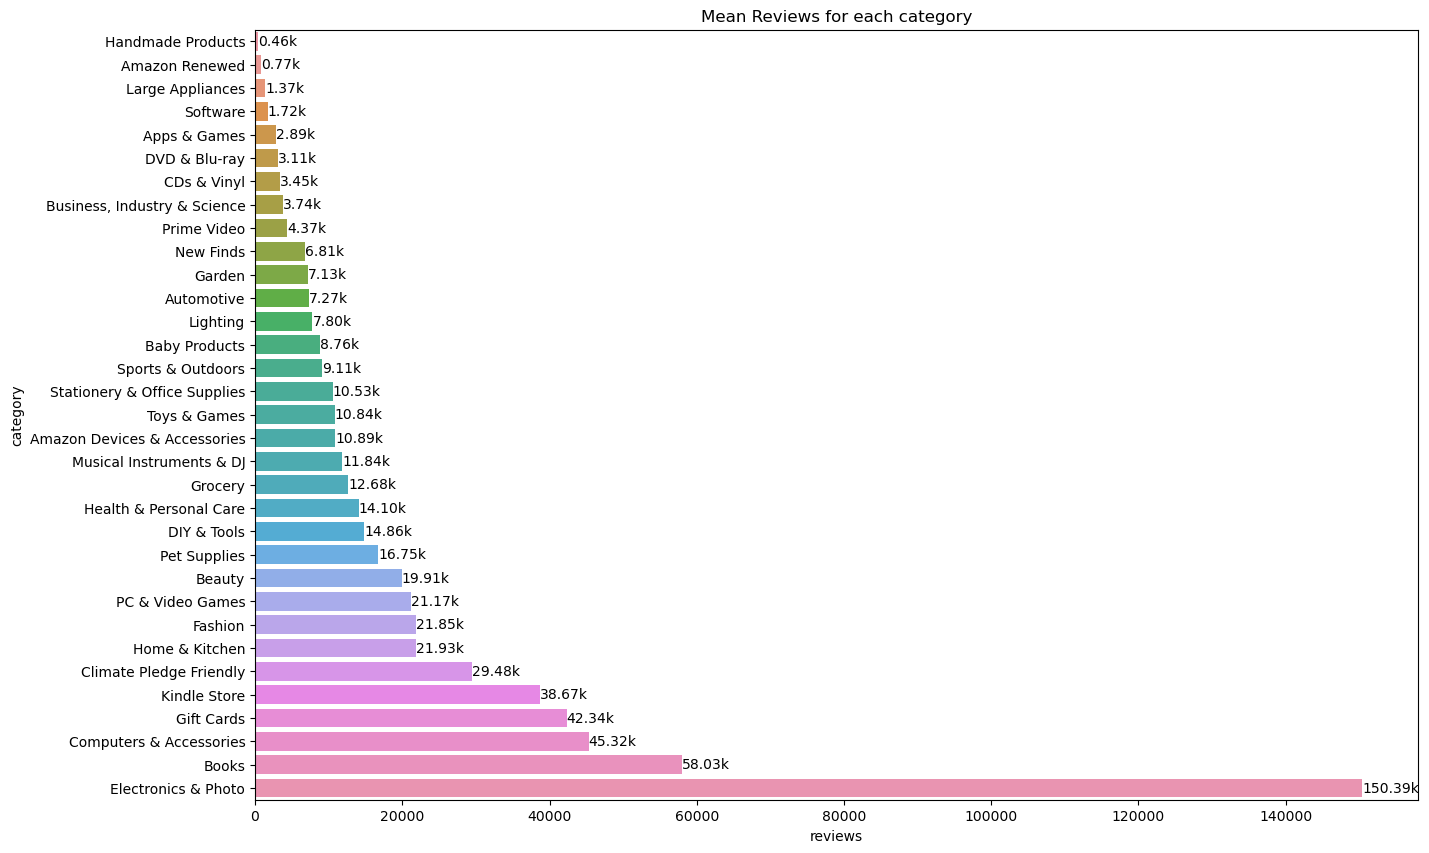

In [37]:
plt.figure(figsize=(15,10))
ax = sns.barplot(df_mean,y=df_mean.index,x=df_mean.reviews,orient='h')
plt.title('Mean Reviews for each category')
for index, value in enumerate(df_mean['reviews']):
    ax.text(value, index, f'{(value/1000):.2f}k', color='black', va="center")


In [41]:
categories = df.category.unique()
fig, axs = plt.subplots(1, len(categories), figsize=(400, 120))

# Loop through each category and plot
for i, cat in enumerate(categories):
    sns.histplot(x=df[df['category']==cat]['reviews'], bins=20, ax=axs[i])
    axs[i].set_title(f'Category {cat}')
    axs[i].set_xlabel('Reviews')
    axs[i].set_ylabel('Frequency')

plt.show()

: 